# Heart disease classification project using machine learning
**This Project is python-based with machine learning to classify heart disease for patients using their medical attributes**

## Project Framework 

#### 1 .Business Problem
> Simply, we want using machine learning algorthims especially classification algorthims to classify if someone have heart disease or not  

#### 2 .Data
> This data set dates from 1988 and consists of four databases: Cleveland, Hungary, Switzerland, and Long Beach V. It contains 76 attributes, including the predicted attribute, but all published experiments refer to using a subset of 14 of them. The "target" field refers to the presence of heart disease in the patient. It is integer valued 0 = no disease and 1 = disease.      
We got it from UCl repositry https://archive.ics.uci.edu/dataset/45/heart+disease.                                              
and there is the same version of it in kaggle https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset.

### **Data Content**

* .age
* .sex
* .chest pain type (4 values)
* .resting blood pressure
* .serum cholestoral in mg/dl
* .fasting blood sugar > 120 mg/dl
* .resting electrocardiographic results (values 0,1,2)
* .maximum heart rate achieved
* .exercise induced angina
* .oldpeak = ST depression induced by exercise relative to rest
* .the slope of the peak exercise ST segment
* .number of major vessels (0-3) colored by flourosopy
* .thal: 0 = normal; 1 = fixed defect; 2 = reversable defect
The names and social security numbers of the patients were recently removed from the database, replaced with dummy values.**

### 3 .EDA
> In this phase we will analyze our data,discover patterns like:
>> 1.Are there is any missing values,duplicates and outliers(Data Cleaning)                                                      
>> 2.Discover The relations between the features                                                                                  
>> 3.Answer most important questions that will help us to understand the business                                             
**in summary we want to build solid background in this business**

# 4 .Modeling
**This phase has 3 steps**
#### A- Data Preprocessing
>> It will help us to make some opreation in data like encoding if we need.                                                      
>> It will help us to select our important features that will get an effictive accuracy from our model.                          
>> It will help us with EDA that we had made in the last phase to choose the sutiable algorithm for our case.
#### B- Model Building
>> In this phase we will use machine learing algorithm to train our model in our data ,simply!.
#### C- Evaluation
>> We will see if the accuracy of model is good for deploy and use it or we have to optimize it more.

## 

### Import  Packages

In [1]:
## Import packages that will help in visulization and manpulation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

**Load Our Data**

In [2]:
## Read data as pandas dataframe
df = pd.read_csv('heart.csv')
## inspect the head(first 5 rows)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


**Let's discover more about data**

In [3]:
## take a sample from data
df.sample(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
153,54,1,2,120,258,0,0,147,0,0.4,1,0,3,1
280,45,0,1,130,234,0,0,175,0,0.6,1,0,2,1
459,51,1,0,140,261,0,0,186,1,0.0,2,0,2,1
982,67,0,0,106,223,0,1,142,0,0.3,2,2,2,1
630,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0


In [4]:
## get the shape of the dataframe(rows,columns)
df.shape

(1025, 14)

In [5]:
## df info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [6]:
## check missing values
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [7]:
## check our target
df.target.value_counts()

1    526
0    499
Name: target, dtype: int64

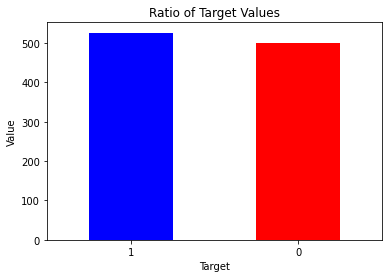

In [8]:
## **Visualize the ratio of target values**
plt.figure(figsize=(6,4))
df.target.value_counts().plot(kind='bar', color=['b','r'])
## more info for the plot
plt.title('Ratio of Target Values')
plt.xticks(rotation=0)
plt.xlabel('Target')
plt.ylabel('Value')
plt.show()

In [9]:
## Get more statstical info for numerical data only not categorical
df[{'age','trestbps','chol','thalach','oldpeak'}].describe().round(3)

,trestbps,oldpeak,chol,thalach,age
count,1025.000,1025.000,1025.000,1025.000,1025.000
mean,131.612,1.072,246.000,149.114,54.434
std,17.517,1.175,51.593,23.006,9.072
min,94.000,0.000,126.000,71.000,29.000
25%,120.000,0.000,211.000,132.000,48.000
50%,130.000,0.800,240.000,152.000,56.000
75%,140.000,1.800,275.000,166.000,61.000
max,200.000,6.200,564.000,202.000,77.000


## EDA
#### Now we will try to discover patterns in data,analyze and visulize it

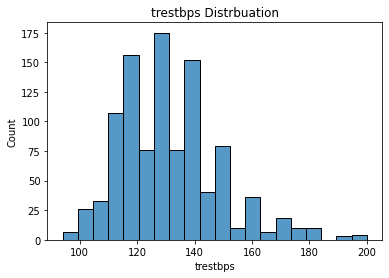

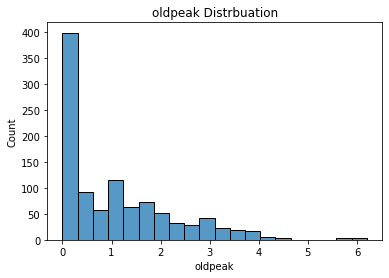

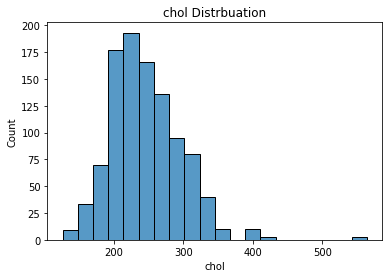

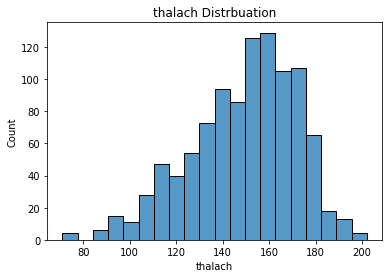

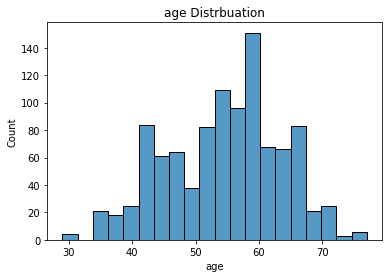

In [10]:
## **Numerical analysis**
## histgram charts
# make list for numerical columns and create histogram for each numerical column
df_numerical = df[{'age','trestbps','chol','thalach','oldpeak'}]
for col in df_numerical:
    sns.histplot(df_numerical[col],bins=20)
    plt.title(col+' Distrbuation')
    plt.show()

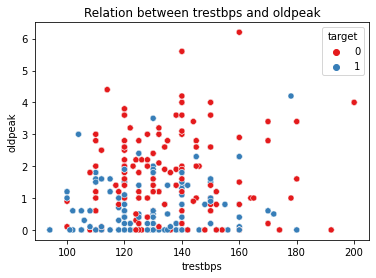

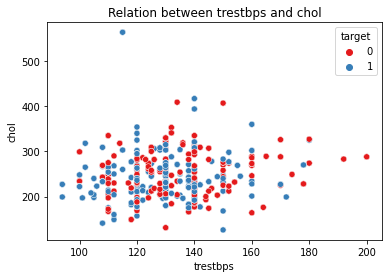

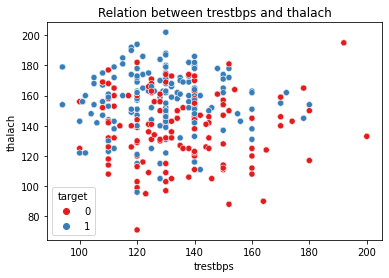

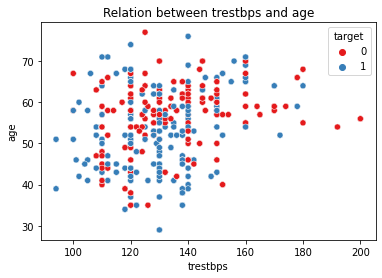

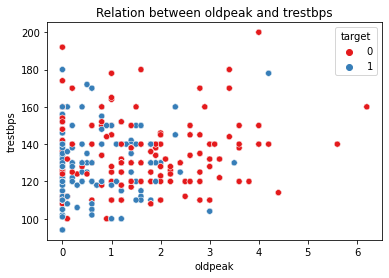

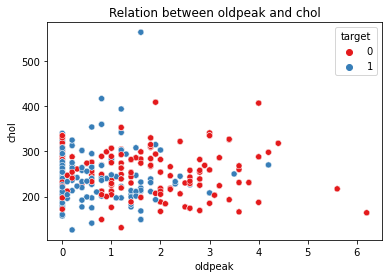

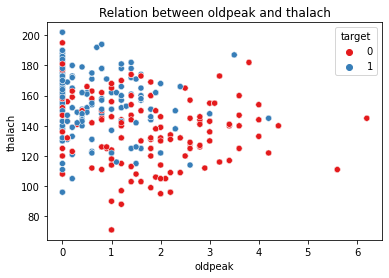

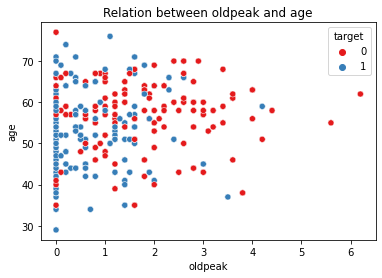

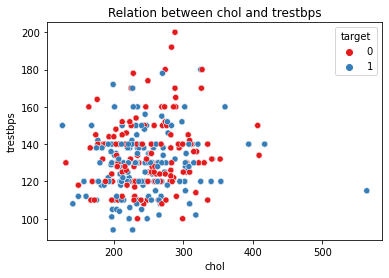

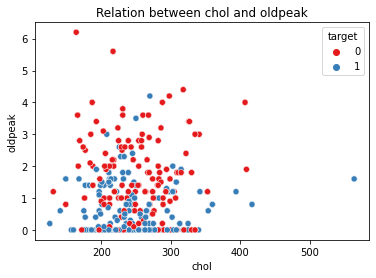

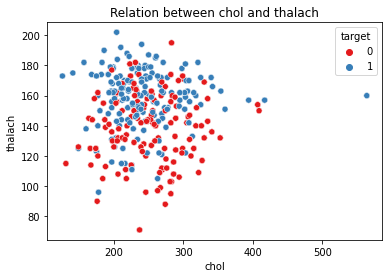

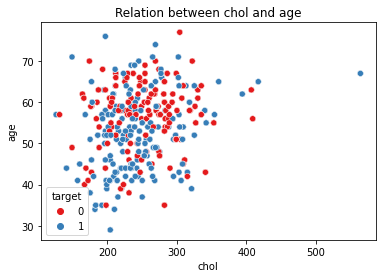

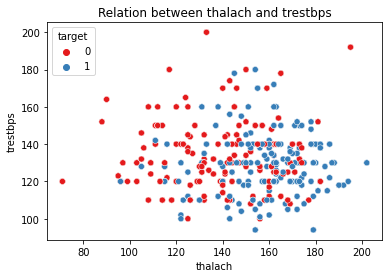

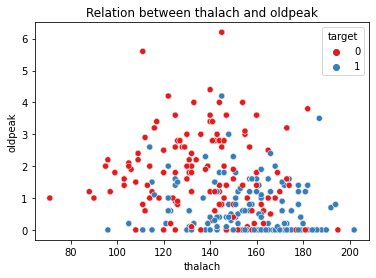

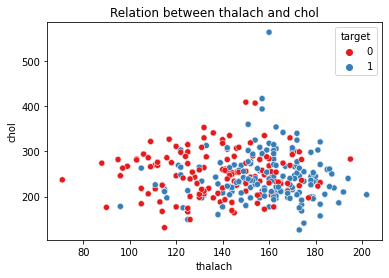

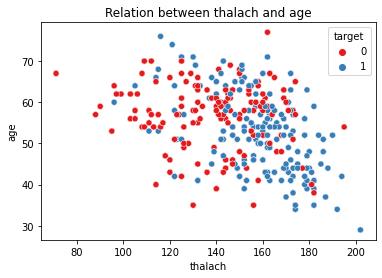

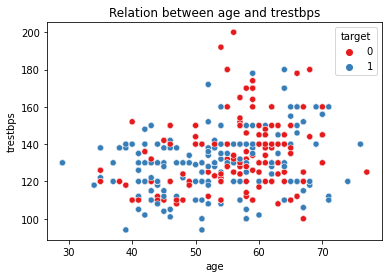

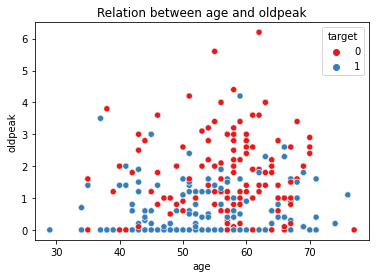

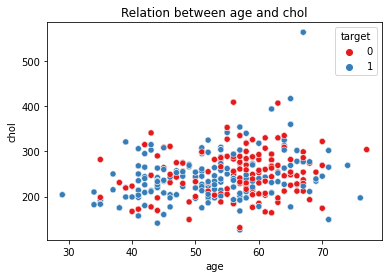

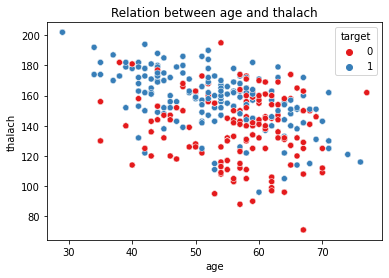

In [11]:
## **Numerical analysis**
## scatter charts
# using df_numerical we will create scatter plot for each 2 numerical column
df_numerical = df[{'age','trestbps','chol','thalach','oldpeak'}]
for col1 in df_numerical.columns:
    for col2 in df_numerical.columns:
        if col1!=col2:            
            sns.scatterplot(x=col1,y=col2,data=df_numerical,hue=df['target'],palette='Set1')    
            plt.title('Relation between '+col1 +' and ' +col2)             
            plt.show()

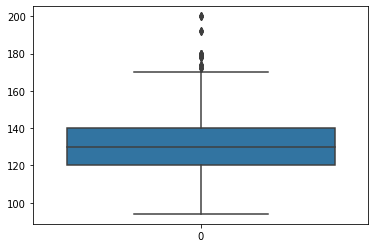

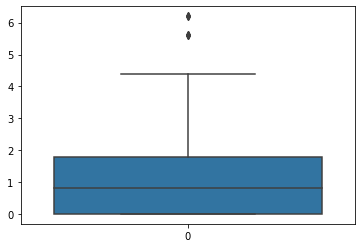

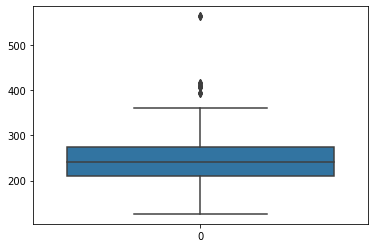

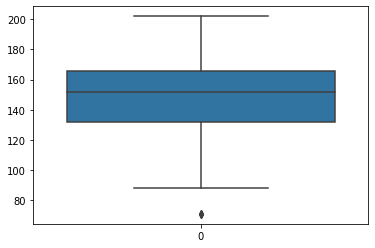

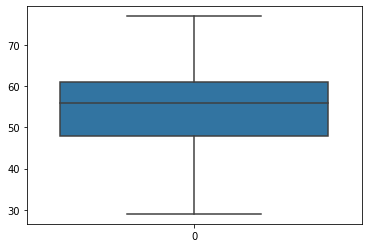

In [12]:
for col in df[{'age','trestbps','chol','thalach','oldpeak'}]:
    sns.boxplot(df[col])
    plt.show()

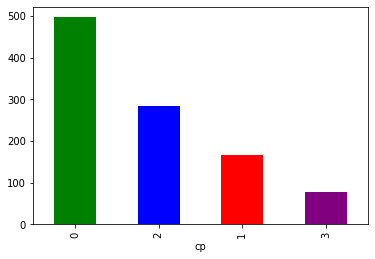

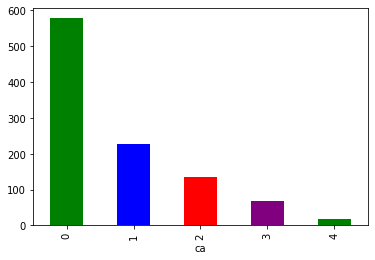

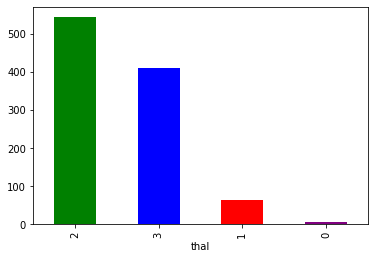

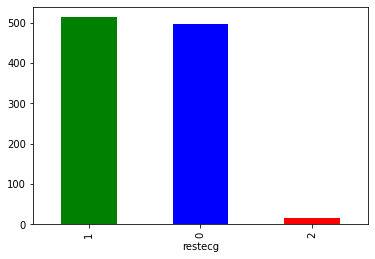

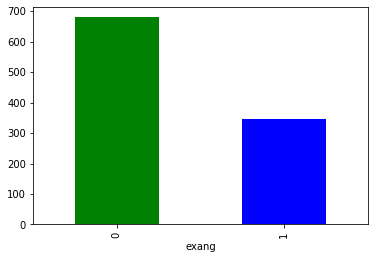

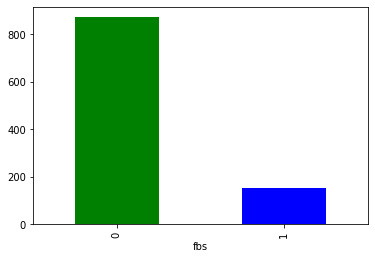

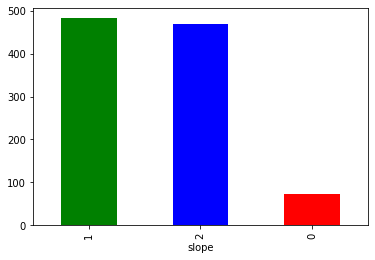

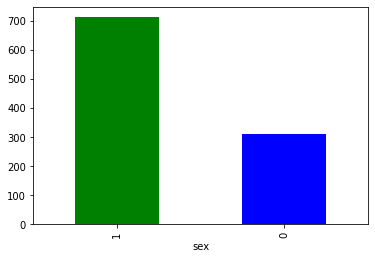

In [13]:
## Check Categorical columns
cat_df = df[{'sex','cp','fbs','restecg','exang','slope','ca','thal'}]
for col in cat_df:
    df[col].value_counts().plot(kind='bar',color=['g','b','r','purple'])
    plt.xlabel(col)
    plt.show()

In [14]:
# get the ratio between patients that have disease and patients that not based on the gender
pd.crosstab(df['target'],df['sex'])   

sex,0,1
target,,
0,86,413
1,226,300


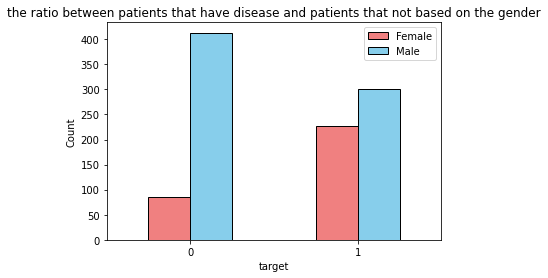

In [15]:
# Let's visualize it
pd.crosstab(df['target'],df['sex']) .plot(kind='bar',color=['lightcoral', 'skyblue'], edgecolor='black')
plt.title('the ratio between patients that have disease and patients that not based on the gender')
plt.xticks(rotation=0)
plt.ylabel('Count')
plt.legend(['Female', 'Male'])
plt.show()

In [16]:
df.groupby('target')['age','trestbps','chol','thalach','oldpeak'].mean().round(2)

,age,trestbps,chol,thalach,oldpeak
target,,,,,
0,56.57,134.11,251.29,139.13,1.60
1,52.41,129.25,240.98,158.59,0.57


<AxesSubplot: xlabel='target'>

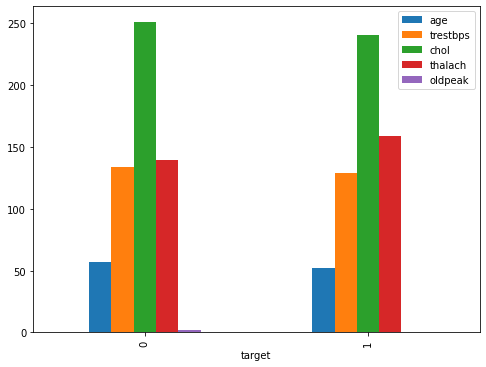

In [17]:
df.groupby('target')['age','trestbps','chol','thalach','oldpeak'].mean().plot(kind='bar',figsize=(8,6))

In [18]:
df.pivot_table(index='sex',columns='target',values='trestbps').round(2)

target,0,1
sex,,
0,146.49,128.84
1,131.53,129.55


In [19]:
df_corr = df.corr().round(2)
df_corr

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.00,-0.10,-0.07,0.27,0.22,0.12,-0.13,-0.39,0.09,0.21,-0.17,0.27,0.07,-0.23
sex,-0.10,1.00,-0.04,-0.08,-0.20,0.03,-0.06,-0.05,0.14,0.08,-0.03,0.11,0.20,-0.28
cp,-0.07,-0.04,1.00,0.04,-0.08,0.08,0.04,0.31,-0.40,-0.17,0.13,-0.18,-0.16,0.43
trestbps,0.27,-0.08,0.04,1.00,0.13,0.18,-0.12,-0.04,0.06,0.19,-0.12,0.10,0.06,-0.14
chol,0.22,-0.20,-0.08,0.13,1.00,0.03,-0.15,-0.02,0.07,0.06,-0.01,0.07,0.10,-0.10
fbs,0.12,0.03,0.08,0.18,0.03,1.00,-0.10,-0.01,0.05,0.01,-0.06,0.14,-0.04,-0.04
restecg,-0.13,-0.06,0.04,-0.12,-0.15,-0.10,1.00,0.05,-0.07,-0.05,0.09,-0.08,-0.02,0.13
thalach,-0.39,-0.05,0.31,-0.04,-0.02,-0.01,0.05,1.00,-0.38,-0.35,0.40,-0.21,-0.10,0.42
exang,0.09,0.14,-0.40,0.06,0.07,0.05,-0.07,-0.38,1.00,0.31,-0.27,0.11,0.20,-0.44
oldpeak,0.21,0.08,-0.17,0.19,0.06,0.01,-0.05,-0.35,0.31,1.00,-0.58,0.22,0.20,-0.44


<AxesSubplot: >

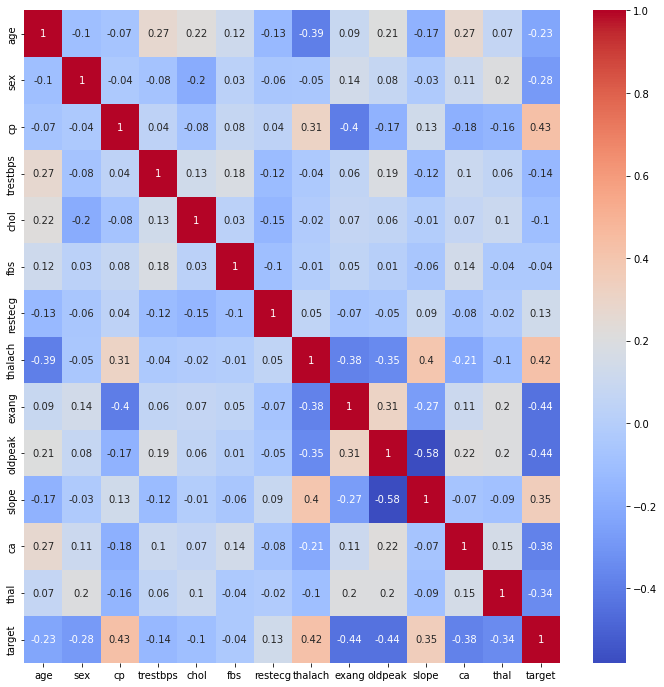

In [20]:
plt.figure(figsize=(12,12))
sns.heatmap(df_corr,annot=True,cmap='coolwarm')

## Modeling

### Now we will use machine learning algorthims in classification

In [21]:
## split data into training and testing
from sklearn.model_selection import train_test_split

X = df.drop('target',axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

**Now we will try to detrmine which ML model is sutiable for our data**
1. Logstic Regerssion
2. KNN Classifier
3. Decision Tree Classifier
4. RandomForest Classifier

In [22]:
# import models from sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [23]:
## Create dictionary
models = {'DecisionTreeClassifier': DecisionTreeClassifier(),'LogsticRegression': LogisticRegression(),'KNN': KNeighborsClassifier(),'RandomForest': RandomForestClassifier()}

In [24]:
## create a func to use it to compare between the models
def evaluate_model(models,X_train,y_train,X_test,y_test):
    model_score={}
    for name,model in models.items():
        model.fit(X_train,y_train)
        model_score[name] = model.score(X_test,y_test)
    return model_score

In [25]:
model_scores = evaluate_model(models=models,X_train=X_train,y_train=y_train,X_test=X_test,y_test=y_test)

model_scores 

{'DecisionTreeClassifier': 0.9707792207792207,
 'LogsticRegression': 0.8116883116883117,
 'KNN': 0.7142857142857143,
 'RandomForest': 0.9805194805194806}

<AxesSubplot: >

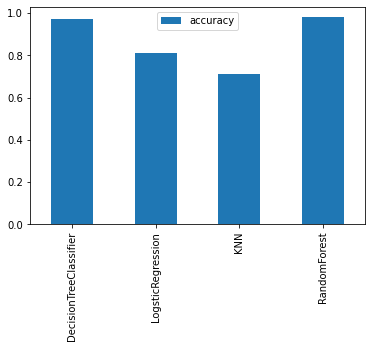

In [26]:
## plot the scores of our models
model_scores_list = pd.DataFrame(model_scores,index=['accuracy'])
model_scores_list.T.plot.bar()

#### Now we're going to build baseline machine learning model 

##### Hypertuning 

In [27]:
### let's start with KNN algorithm
train_scores = []
test_scores = []

neighbours = range(1,21)
knn = KNeighborsClassifier()
for i in neighbours:
    knn.set_params(n_neighbors=i)
    knn.fit(X_train, y_train)
    train_scores.append(knn.score(X_train, y_train))
    test_scores.append(knn.score(X_test, y_test))

In [28]:
train_scores

[1.0,
 0.9902370990237099,
 0.9790794979079498,
 0.9079497907949791,
 0.8772663877266388,
 0.799163179916318,
 0.7838214783821479,
 0.7921896792189679,
 0.7796373779637378,
 0.7754532775453278,
 0.7852161785216178,
 0.7684797768479776,
 0.7698744769874477,
 0.7754532775453278,
 0.7656903765690377,
 0.7740585774058577,
 0.7642956764295676,
 0.7670850767085077,
 0.7656903765690377,
 0.7461645746164575]

In [29]:
test_scores

[0.9902597402597403,
 0.9448051948051948,
 0.8831168831168831,
 0.7954545454545454,
 0.7142857142857143,
 0.685064935064935,
 0.6785714285714286,
 0.7012987012987013,
 0.7272727272727273,
 0.7175324675324676,
 0.7272727272727273,
 0.724025974025974,
 0.711038961038961,
 0.7207792207792207,
 0.7077922077922078,
 0.7337662337662337,
 0.7142857142857143,
 0.724025974025974,
 0.7272727272727273,
 0.7207792207792207]

Max test score = 99.03%


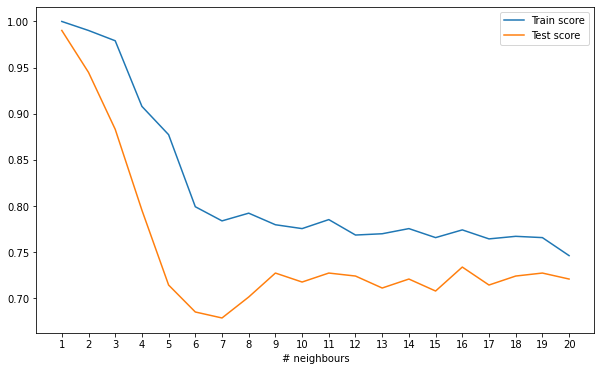

In [30]:
## Let's plot the scores
print(f'Max test score = {max(test_scores)*100:.2f}%')
plt.figure(figsize=(10,6))
plt.plot(neighbours,train_scores, label='Train score')
plt.plot(neighbours,test_scores, label='Test score')
plt.xlabel('# neighbours')
plt.xticks(range(1,21,1))
plt.legend()
plt.show()

### Let's get rid of KNN and foucs in LR, DT and RF
## Hyperparmeter tuning with RandomizedSearch

In [31]:
## Logstic Regerssion
log_reg_grid = {'C':np.logspace(-4,4,20),'solver':['liblinear']}

## RandomForest
rf_grid = {'n_estimators':np.arange(10,1000,50),'max_depth':[None,3,5,10],'min_samples_split':np.arange(2,20,2)
           ,'min_samples_leaf':np.arange(1,20,2)}

## DescionTree
DT_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


#### Tune Logistic Regression

In [32]:
## Tune Logistic Regression
from sklearn.model_selection import RandomizedSearchCV
np.random.seed(42)
rs_log_reg = RandomizedSearchCV(LogisticRegression(),param_distributions=log_reg_grid,cv=5,n_iter=20,verbose=True)

# fit model for LogsticRegression
rs_log_reg.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [33]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 4.281332398719396}

In [34]:
rs_log_reg.score(X_test,y_test)

0.8051948051948052

### Tune RandomForest 

In [35]:
## Tune RandomForest
np.random.seed(42)
rs_rf = RandomizedSearchCV(RandomForestClassifier(),param_distributions=rf_grid,cv=5,n_iter=20,verbose=True)

# fit model for LogsticRegression
rs_rf.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [36]:
rs_rf.best_params_

{'n_estimators': 510,
 'min_samples_split': 14,
 'min_samples_leaf': 1,
 'max_depth': None}

In [37]:
rs_rf.score(X_test,y_test)

0.935064935064935

### Tune Decision Tree

In [38]:
rs_dt = RandomizedSearchCV(DecisionTreeClassifier(), param_distributions=DT_grid, n_iter=20, cv=5, verbose=True)

# fit the model
rs_dt.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_iter=20,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [None, 10, 20, 30, 40, 50],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'splitter': ['best', 'random']},
                   verbose=True)

In [39]:
## get best parameters
print('Best parameters for this model: ',rs_dt.best_params_)
# Get The score
print('\n')
print('Score :',rs_dt.score(X_test,y_test))

Best parameters for this model:  {'splitter': 'random', 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 30, 'criterion': 'gini'}


Score : 0.9805194805194806


### Let's use models in predictions and Evaluate them

In [40]:
# import metrics for evaluation
from sklearn.metrics import classification_report,confusion_matrix

In [41]:
## LogsticRegression
LR_pred = rs_log_reg.predict(X_test)
## Evaluate the model
print(classification_report(LR_pred,y_test))
print('\n')
print(confusion_matrix(LR_pred,y_test))

              precision    recall  f1-score   support

           0       0.75      0.86      0.80       139
           1       0.87      0.76      0.81       169

    accuracy                           0.81       308
   macro avg       0.81      0.81      0.80       308
weighted avg       0.81      0.81      0.81       308



[[119  20]
 [ 40 129]]


In [42]:
## Decision Tree
DT_pred = rs_dt.predict(X_test)
## Evaluate the model
print(classification_report(DT_pred,y_test))
print('\n')
print(confusion_matrix(DT_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98       165
           1       0.96      1.00      0.98       143

    accuracy                           0.98       308
   macro avg       0.98      0.98      0.98       308
weighted avg       0.98      0.98      0.98       308



[[159   6]
 [  0 143]]


In [43]:
## Random Forest
RF_pred = rs_rf.predict(X_test)
## Evaluate the model
print(classification_report(RF_pred,y_test))
print('\n')
print(confusion_matrix(RF_pred,y_test))

              precision    recall  f1-score   support

           0       0.93      0.94      0.94       157
           1       0.94      0.93      0.93       151

    accuracy                           0.94       308
   macro avg       0.94      0.93      0.94       308
weighted avg       0.94      0.94      0.94       308



[[148   9]
 [ 11 140]]
